#Date: 12022024 SFG: CN Stretch of CNC6CN, Pulse peaker = 15 ; Bandwidth = 0.5, Delay stage = 3.26
Sample collected from Humaira Haq

In [1]:
import sys
#sys.path.append('C:\\Users\\Egemba\\OneDrive - Auburn University\\Documents\\GitHub\\sfgProcessing')
sys.path.append('C:\\Users\\peo0005\\OneDrive - Auburn University\\Documents\\GitHub\\sfgProcessing')

#imports go here
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy import exp
from sfgDataFolder import SFGdataFolder
import numpy as np
from scipy.interpolate import interp1d



import matplotlib as mpl
# Set the background color globally using rcParams
mpl.rcParams['figure.facecolor'] = 'w'

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
#path = "\\\\arc.auburn.edu\\lab\\ohnogroup\\RawData\\Celestine\\SFG\\2024\\1202\\"
path = "C:\\Users\\peo0005\\OneDrive - Auburn University\\Desktop\\1202\\"

from IPython.display import display, Markdown
date = list(filter(lambda x: x != "", path.split('\\')))[-1]
year = list(filter(lambda x: x != "", path.split('\\')))[-2]
display(Markdown('**Year: {}, Month & Day: {}**'.format(year,date)))

**Year: Desktop, Month & Day: 1202**

In [4]:
folder = SFGdataFolder(path)

CH Spectra Available:  []
CN Spectra Available:  ['Blank', 'Blankatpulsepicker15', 'CNC6NCspot1', 'CNC6NCspot2']
CO Spectra Available:  []


CH:


CN:


Sample Name: Blank

Spectra Available:
Blank_CN_4600 (2).csv
Blank_CN_4625.csv
Blank_CN_4650.csv
Blank_CN_4700.csv
Blank_CN_4725.csv
Blank_CN_4750.csv
Blank_CN_4775.csv
Blank_CN_4800.csv
Blank_CN_4850.csv

Background Available:
Blank_CN_bg.csv

Calibration:
Blank_CN_calib.csv


Sample Name: Blankatpulsepicker15

Spectra Available:
Blankatpulsepicker15_CN_4600.csv
Blankatpulsepicker15_CN_4625.csv
Blankatpulsepicker15_CN_4650.csv
Blankatpulsepicker15_CN_4700.csv
Blankatpulsepicker15_CN_4725.csv
Blankatpulsepicker15_CN_4750.csv
Blankatpulsepicker15_CN_4775.csv
Blankatpulsepicker15_CN_4800.csv
Blankatpulsepicker15_CN_4850.csv

Background Available:
Blankatpulsepicker15_CN_bg.csv

Calibration:
Blankatpulsepicker15_CN_calib.csv


Sample Name: CNC6NCspot1

Spectra Available:
CNC6NCspot1_CN_4600.csv
CNC6NCspot1_CN_4625.csv
CNC6NCspot1_CN_4650.

Processing CN spectrum:  Blank
Sample Name: Blank

Spectra Available:
Blank_CN_4600 (2).csv
Blank_CN_4625.csv
Blank_CN_4650.csv
Blank_CN_4700.csv
Blank_CN_4725.csv
Blank_CN_4750.csv
Blank_CN_4775.csv
Blank_CN_4800.csv
Blank_CN_4850.csv

Background Available:
Blank_CN_bg.csv

Calibration:
Blank_CN_calib.csv


ACN calibration file:
Blank_CN_calib.csv
Fitted ACN peak center:2234.0034047781496
Shift is  -19.596595221850293
ACN Calibration applied.


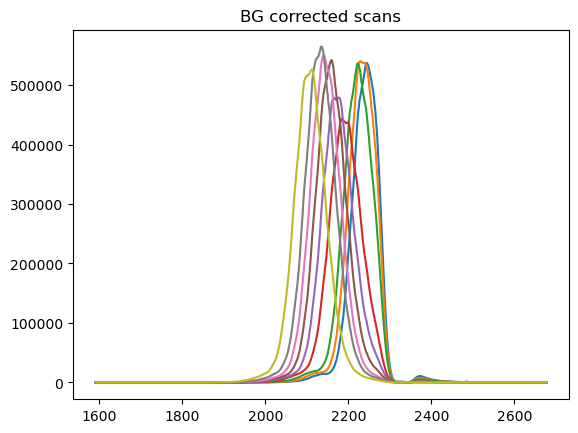

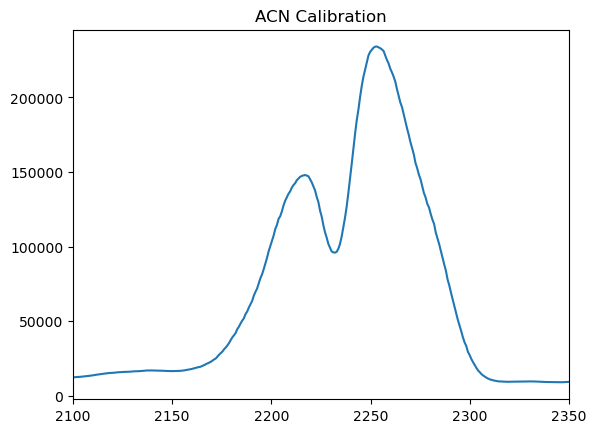

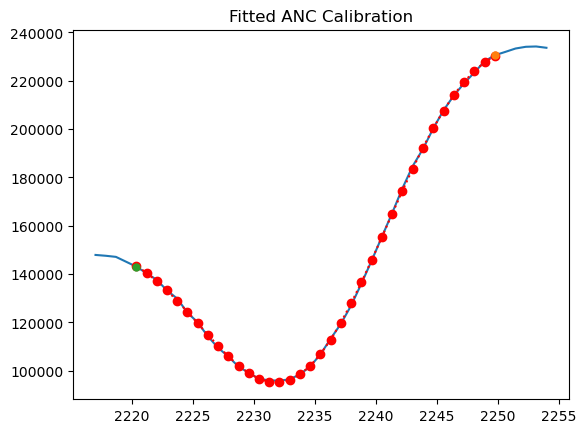

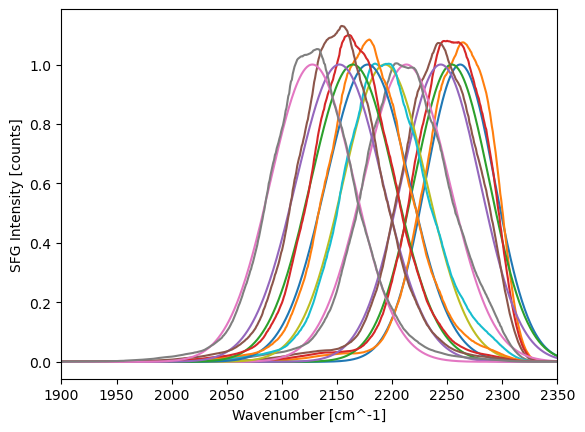

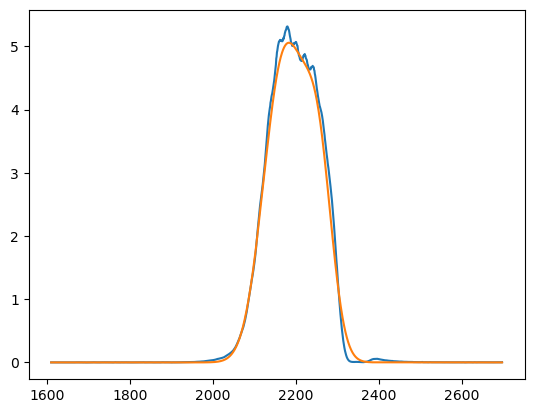

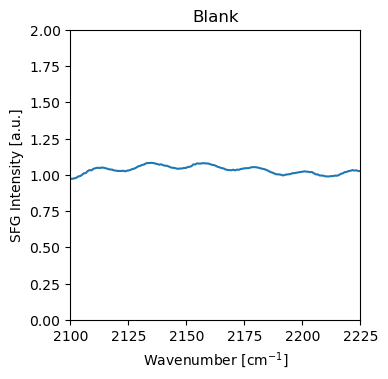

In [13]:
s = folder.processSpectrum("CN",0)

s.plot()
s.calibACN([2220,2250])
s.fitgaussians()

Processing CN spectrum:  Blankatpulsepicker15
Sample Name: Blankatpulsepicker15

Spectra Available:
Blankatpulsepicker15_CN_4600.csv
Blankatpulsepicker15_CN_4625.csv
Blankatpulsepicker15_CN_4650.csv
Blankatpulsepicker15_CN_4700.csv
Blankatpulsepicker15_CN_4725.csv
Blankatpulsepicker15_CN_4750.csv
Blankatpulsepicker15_CN_4775.csv
Blankatpulsepicker15_CN_4800.csv
Blankatpulsepicker15_CN_4850.csv

Background Available:
Blankatpulsepicker15_CN_bg.csv

Calibration:
Blankatpulsepicker15_CN_calib.csv


ACN calibration file:
Blankatpulsepicker15_CN_calib.csv
Fitted ACN peak center:2233.1535478377714
Shift is  -20.446452162228525
ACN Calibration applied.


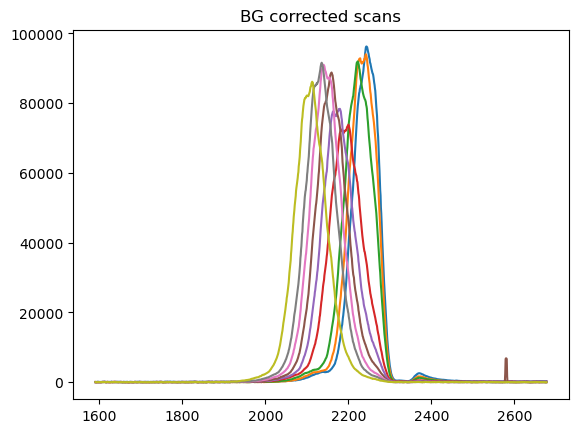

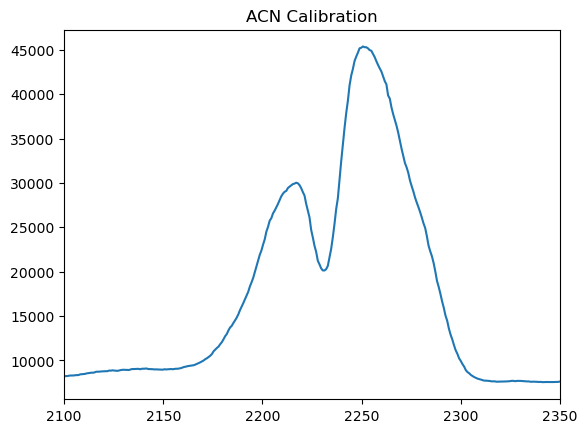

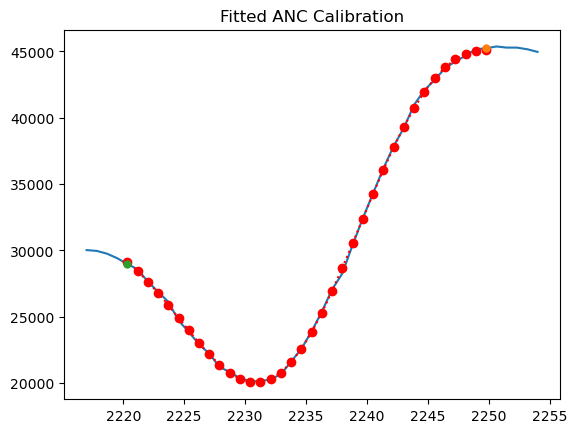

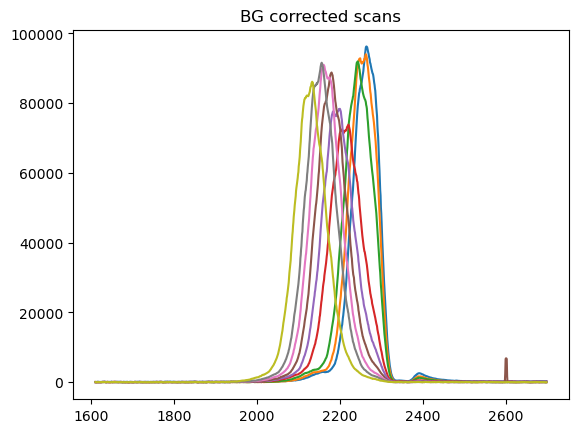

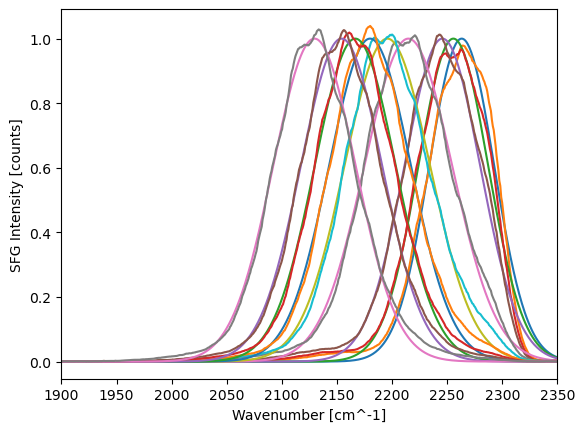

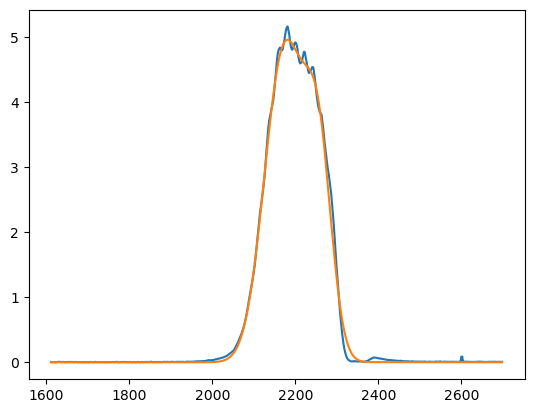

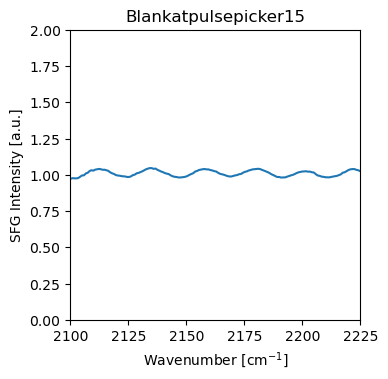

In [14]:
s = folder.processSpectrum("CN",1)

s.plot()
s.calibACN([2220,2250])
s.plot()
s.fitgaussians()

#set blank interpolation function
blank = s.gaussiannorm
blank_x = s.scans[0]['wn']
blank_interp_func = interp1d(blank_x, blank, kind='linear', fill_value="extrapolate")

Processing CN spectrum:  CNC6NCspot1
Sample Name: CNC6NCspot1

Spectra Available:
CNC6NCspot1_CN_4600.csv
CNC6NCspot1_CN_4625.csv
CNC6NCspot1_CN_4650.csv
CNC6NCspot1_CN_4700.csv
CNC6NCspot1_CN_4725.csv
CNC6NCspot1_CN_4750.csv
CNC6NCspot1_CN_4775.csv
CNC6NCspot1_CN_4800.csv
CNC6NCspot1_CN_4850.csv

Background Available:
CNC6NCspot1_CN_bg.csv

Calibration:
CNC6NCspot1_CN_calib.csv


ACN calibration file:
CNC6NCspot1_CN_calib.csv
Fitted ACN peak center:2245.1998964480167
Shift is  -8.400103551983193
ACN Calibration applied.


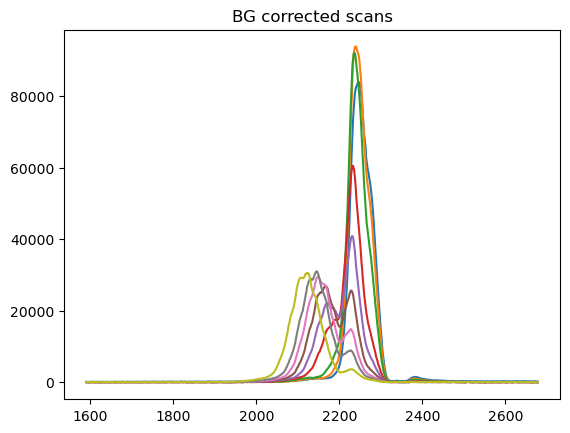

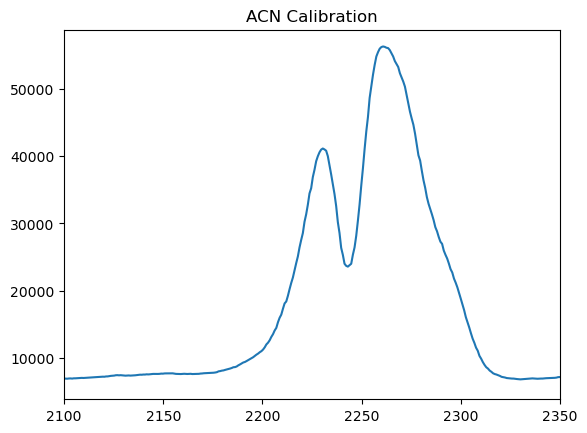

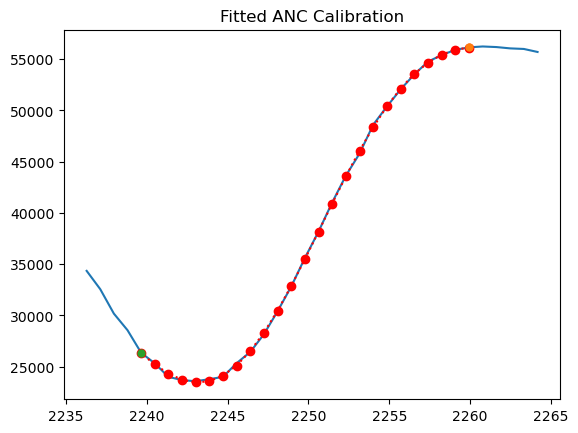

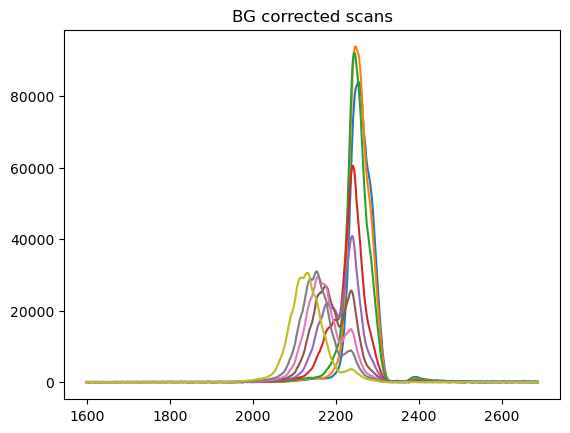

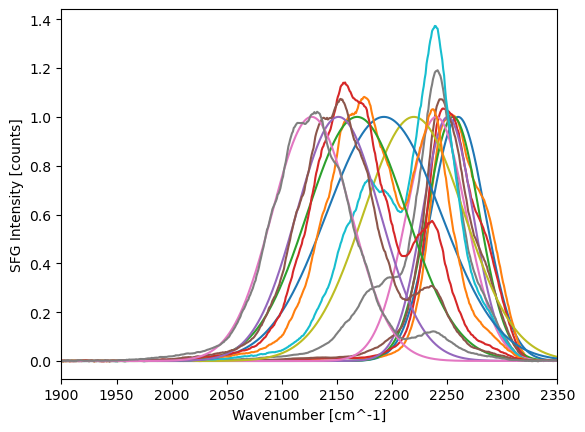

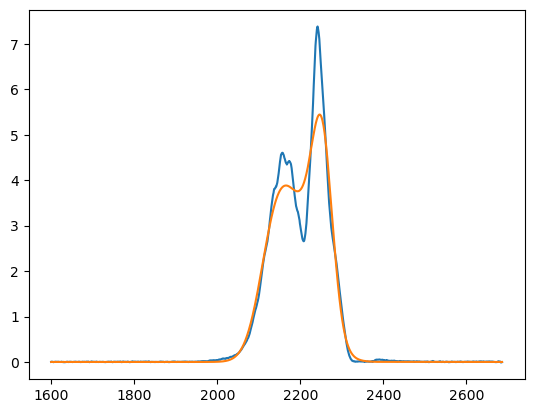

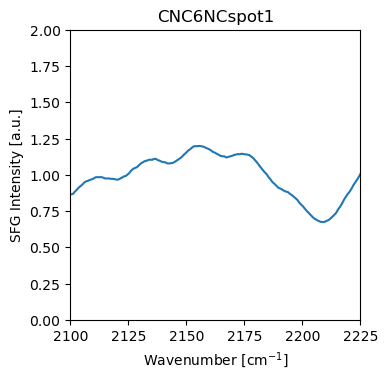

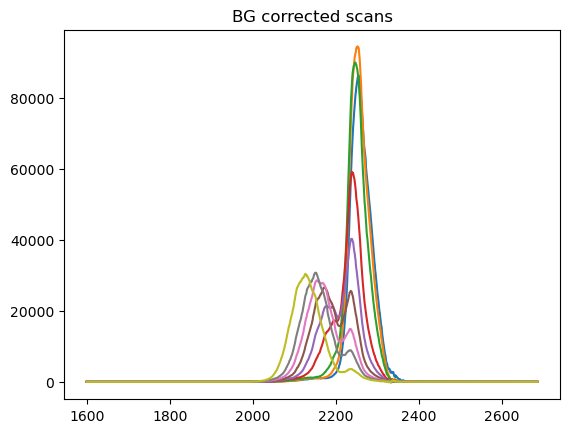

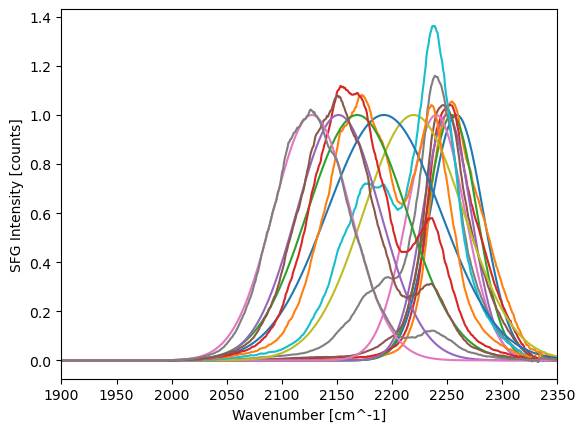

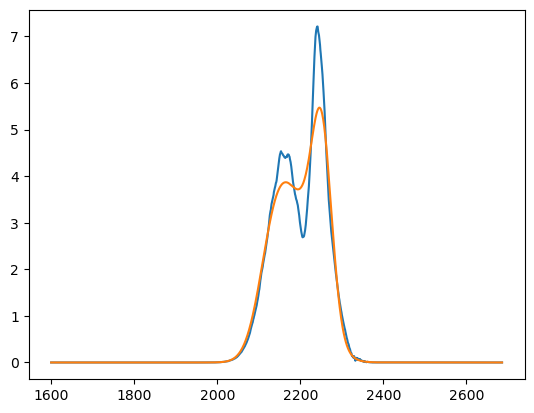

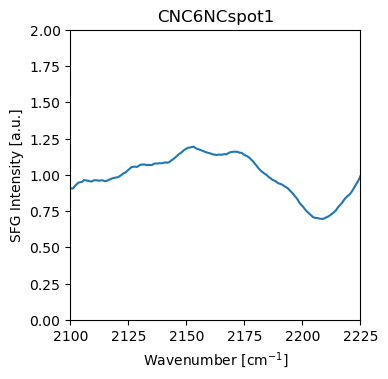

In [15]:
s = folder.processSpectrum("CN",2)

s.plot()
s.calibACN([2240,2260])
s.plot()
s.fitgaussians()
s.corrEtalon(blank_interp_func)
s.plot()
s.fitgaussians()

Processing CN spectrum:  CNC6NCspot2
Sample Name: CNC6NCspot2

Spectra Available:
CNC6NCspot2_CN_4600.csv
CNC6NCspot2_CN_4625.csv
CNC6NCspot2_CN_4650.csv
CNC6NCspot2_CN_4700.csv
CNC6NCspot2_CN_4725.csv
CNC6NCspot2_CN_4750.csv
CNC6NCspot2_CN_4775.csv
CNC6NCspot2_CN_4800.csv
CNC6NCspot2_CN_4850.csv

Background Available:
CNC6NCspot2_CN_bg.csv

Calibration:
CNC6NCspot2_CN_calib.csv


ACN calibration file:
CNC6NCspot2_CN_calib.csv
Fitted ACN peak center:2244.851177156466
Shift is  -8.748822843534072
ACN Calibration applied.


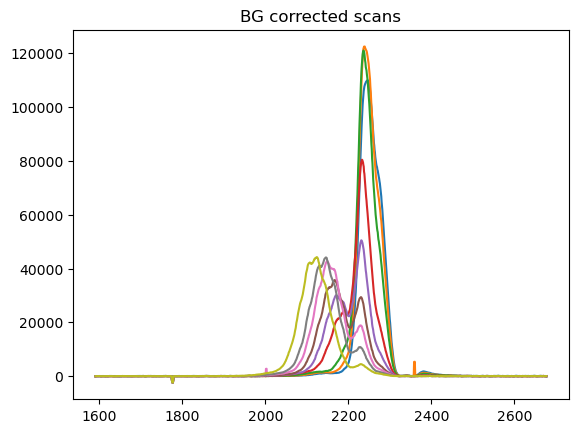

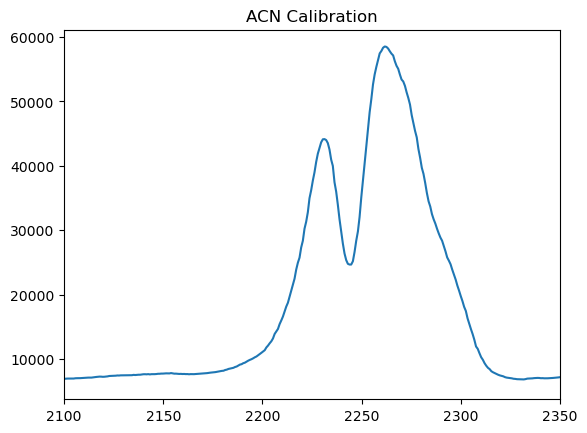

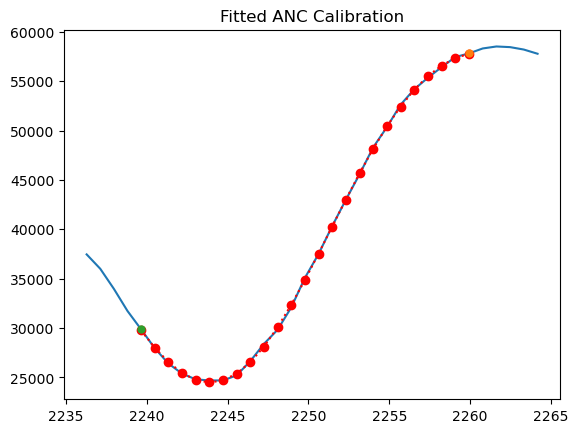

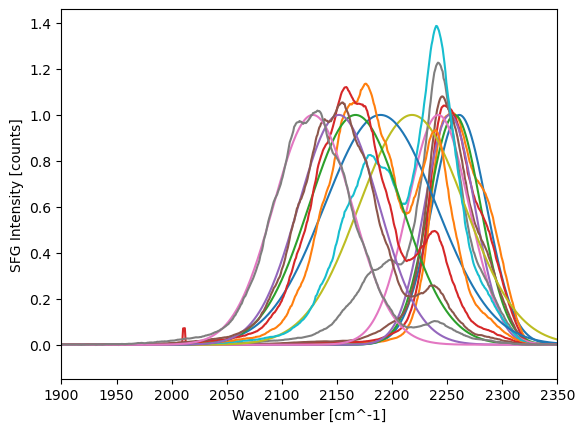

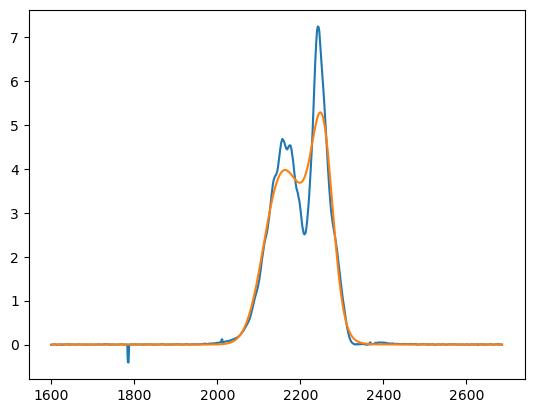

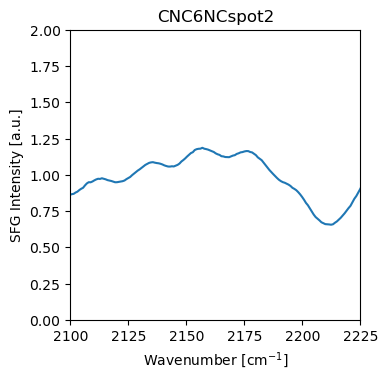

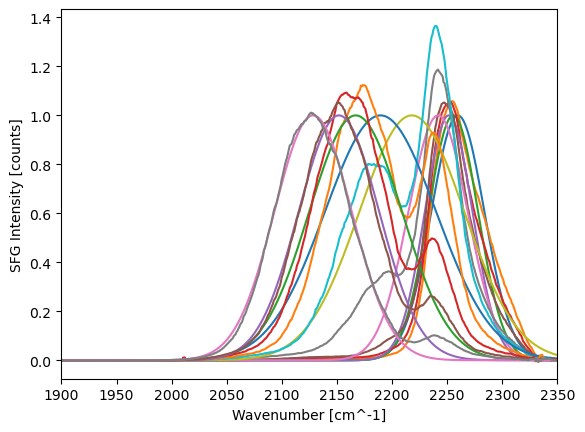

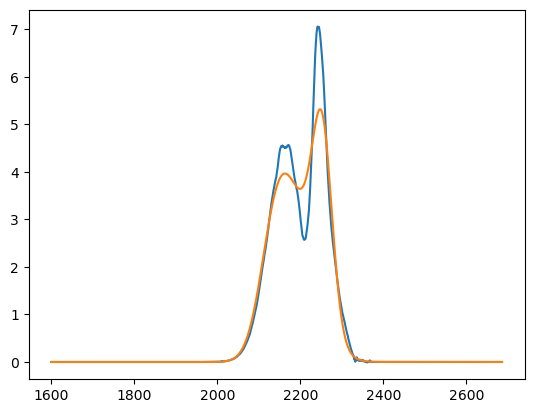

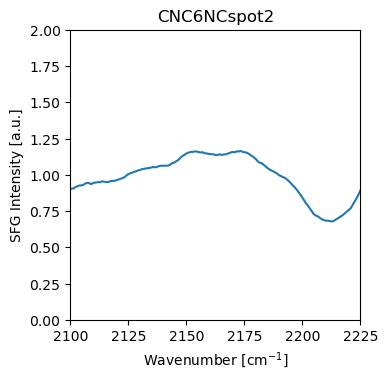

In [17]:
s = folder.processSpectrum("CN",3)

s.plot()
s.calibACN([2240,2260])
s.fitgaussians()
s.corrEtalon(blank_interp_func)
s.fitgaussians()

